In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation 

In [2]:
def gradient_descent(x0,y0,alpha,num_iters):
    x=x0
    y=y0
    positions=[]
    for i in range(num_iters):
        grad=gradient(x,y)
        x-=alpha*grad[0]
        y-=alpha*grad[1]
        positions.append([x,y])
        if np.linalg.norm(grad)<1e-3:
            break
    return x,y,positions            

In [3]:
def parabloid(x,y):
    return x**2+y**2

In [4]:
def gradient(x,y):
    return np.array([2*x,2*y])

In [33]:
x0=4
y0=-2
alpha=0.001
num_iters=1000

In [34]:
x_min,y_min,positions=gradient_descent(x0,y0,alpha,num_iters)

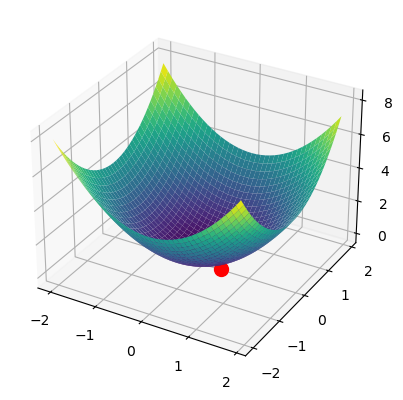

In [35]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
x,y=np.meshgrid(np.arange(-2,2,0.1),np.arange(-2,2,0.1))
z=parabloid(x,y)
ax.plot_surface(x,y,z,cmap='viridis')
ball=ax.scatter(x_min,y_min,s=100,c='red')
def animate(i):
    ball.set_offsets(positions[i])
    ball.set_3d_properties(positions[i][1],zdir='z')
    return fig
anim = FuncAnimation(fig,animate,frames=num_iters,interval=10)
plt.show()
anim.save('ball_rolling.mp4',writer='ffmpeg')